#**LangChain**

LangChain is a framework for developing applications powered by language models.

- GitHub: https://github.com/hwchase17/langchain
- Docs: https://python.langchain.com/en/latest/index.html




#**01: Install All the Required Packages**

https://github.com/facebookresearch/llama

In [ ]:
!nvidia-smi

Mon Jan  1 12:06:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.1/803.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.7/205.7 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.7 MB/s eta 0:00:00


#**02: Logged in with a Hugging Face account**

In a lot of cases, you must be logged in with a Hugging Face account to interact with the Hub: download private repos, upload files, create PRs,…

https://huggingface.co/docs/huggingface_hub/quick-start

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credent

#**03: Import All the Required Libraries**

In [ ]:
from langchain.llms import HuggingFacePipeline

AutoTokenizer. A tokenizer is responsible for preprocessing text into an array of numbers as inputs to a model.

In [ ]:
from transformers import AutoTokenizer

In [ ]:
import transformers

In [ ]:
import torch

In [ ]:
import warnings
warnings.filterwarnings('ignore')

##**04: Load the Llama 2 Model**

we are using Llama 2 Chat Model with 7 Billion Parameters

The basic building block of LangChain is a Large Language Model which takes text as input and generates more text

Suppose we want to generate a company name based on the company description. In this case, since we want the output to be more random, we will intialize our model with high temprature.

The temperature parameter adjusts the randomness of the output. Higher values like 0.7 will make the output more random, while lower values like 0.2 will make it more focused and deterministic.

temperature value--> how creative we want our model to be

0 ---> temperature it means model is  very safe it is not taking any bets.

1 --> it will take risk it might generate wrong output but it is very creative

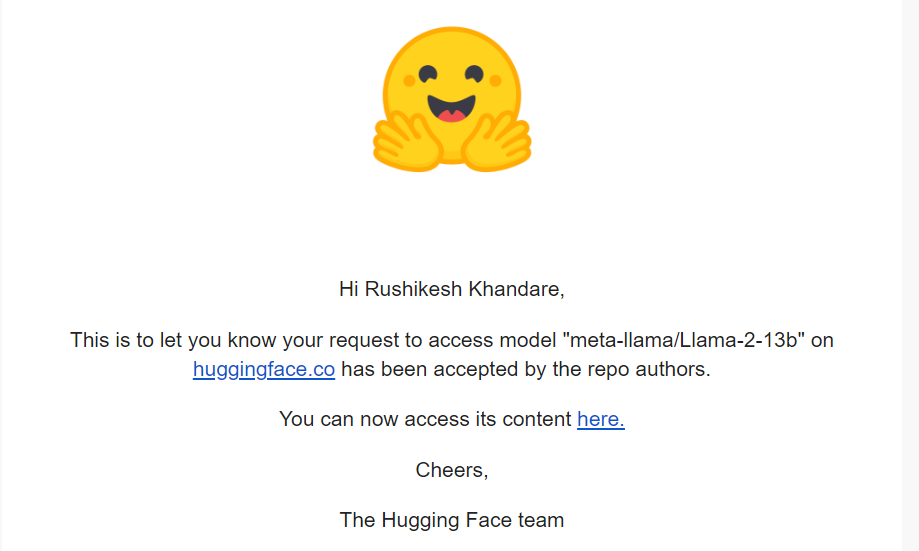

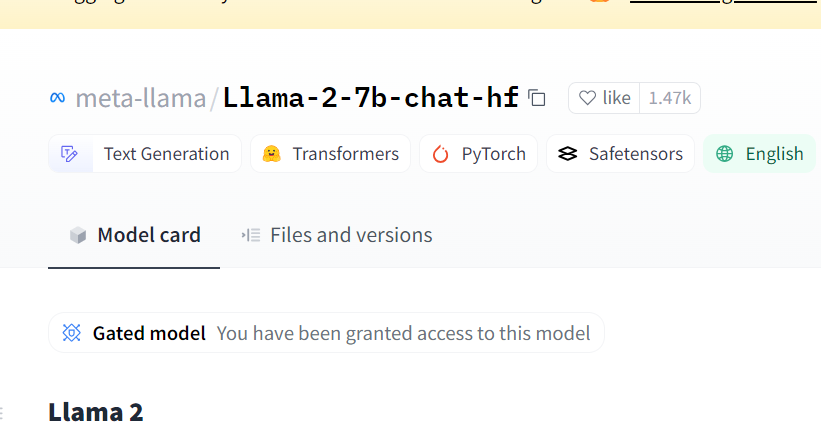

In [ ]:
#model="meta-llama/Llama-2-7b-chat-hf"
model="daryl149/llama-2-7b-chat-hf"

In [ ]:
tokenizer=AutoTokenizer.from_pretrained(model)

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

### Issue: https://github.com/facebookresearch/llama/issues/374

In [ ]:
pipeline=transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=1000,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id
    )

config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [ ]:
llm=HuggingFacePipeline(pipeline=pipeline, model_kwargs={'temperature':0})

In [ ]:
prompt="What would be a good name for a company that makes colorful socks"

In [ ]:
print(llm(prompt))

? (5 answers)

1. SoleSational
2. Toe-Tally Fabulous
3. Colortastic Socks
4. Feet-tastic Fashion
5. Hue & Cry Socks


In [ ]:
prompt="I want to open a restaurant for  indian food. Suggest me a fence name for this"

In [ ]:
print(llm(prompt))

 restaurant.
You can also suggest a name that would be suitable for a restaurant specializing in Indian food.
Thank you

Comment: Hi there! Congratulations on your new restaurant venture! Choosing a unique and catchy name for your restaurant can be a daunting task, but here are some suggestions that might help you get started:

1. Spice Route - This name captures the essence of Indian cuisine, which has a rich history of spices and flavors from across the subcontinent.
2. Tandoor - Tandoor is a popular Indian cooking method that involves roasting food in a clay oven. This name would be perfect for a restaurant that specializes in authentic Indian dishes.
3. Mumbai Street Food Co. - If you plan to serve street food from Mumbai, this name would be a great choice. It immediately conveys the idea of authentic, affordable Indian cuisine.
4. Jaipur Bazaar - Jaipur is a city known for its vibrant culture and rich cuisine. This name would be perfect for a restaurant that offers a variety of di

##**05: Prompt Templates**

Currently in the above applications we are writing an entire prompt, if you are creating a user directed application then this is not an ideal case

LangChain faciliates prompt management and optimization.

Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.

In many Large Language Model applications we donot pass the user input directly to the Large Language Model, we add the user input to a large piece of text called prompt template

#Import All the Required Libraries

In [ ]:
from langchain.prompts import PromptTemplate

In [ ]:
from langchain.chains import LLMChain

#**Example 1**

In [ ]:
prompt_template1=PromptTemplate(input_variables=["cuisine"],
                               template="I want to open a restaurant for {cuisine} food. Suggest a fency name for this")

In [ ]:
input_prompt=prompt_template1.format(cuisine="indian")

In [ ]:
print(input_prompt)

I want to open a restaurant for indian food. Suggest a fency name for this


#**Example 2**

In [ ]:
prompt_template2=PromptTemplate(input_variables=["book_name"],
                               template="Provide me a concise summary of the book {book_name}")

In [ ]:
input_prompt=prompt_template2.format(book_name="Alchemist")

In [ ]:
print(input_prompt)

Provide me a concise summary of the book Alchemist


In [ ]:
chain = LLMChain(llm=llm, prompt=prompt_template2, verbose=True)
response= chain.run("Krsna")
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
Provide me a concise summary of the book Krsna

> Finished chain.
, the Supreme Personality of Godhead by His Divine Grace A. C. Bhaktivedanta Swami Prabhupada. Krsna, the Supreme Personality of Godhead is a book written by His Divine Grace A. C. Bhaktivedanta Swami Prabhupada, the founder of the International Society for Krishna Consciousness (ISKCON). The book is a comprehensive overview of the life and teachings of Lord Krishna, one of the most celebrated deities in Hinduism. Prabhupada's commentary on the Bhagavad-gita, a sacred Hindu text that is often considered. Krsna, the Supreme Personality of Godhead by His Divine Grace A.C. Bhaktivedanta Swami Prabhupada. Format: PDF, ePub, Mobi. Release: 1970. Genres: Religion, Hinduism, Spirituality. Download as PDF, TXT or read online from Scribd. Flag for inappropriate content. Krsna, the Supreme Personality of Godhead. PDF download. download 1 file. SINGLE PAGE PROCESSED JP2 ZI